In [37]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv

load_dotenv()

True

In [38]:
llm = ChatOpenAI()

In [39]:
#create state

class BlogState(TypedDict):
    title: str
    outline: str
    content: str



In [40]:
def create_outline(state: BlogState)-> BlogState:

    #fetch title
    title = state['title']
    
    #call llm gen outline
    prompt = f"Generate a detailed outline for a blog on the topic - {title}"
    outline = llm.invoke(prompt).content
    
    #update state
    state['outline'] = outline

    return state

In [41]:
def create_blog(state: BlogState) ->BlogState:

    # fetch titl, outline
    title = state['title']
    outline = state['outline']

    #call llm gen
    prompt = f"Wrie a detailed blog on the title- {title} using the following outline. \n {outline}"

    content =llm.invoke(prompt).content

    state['content'] = content

    return state

In [42]:
graph = StateGraph(BlogState)

#nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

#edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)
               
               

workflow = graph.compile() 


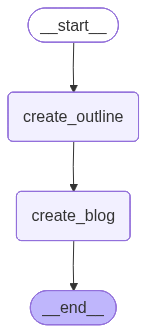

In [43]:
workflow

In [44]:
initial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(initial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': "I. Introduction\n    A. Brief overview of Artificial Intelligence (AI)\n    B. Importance of AI in today's technological world\n    C. Growing significance of AI in India\n    \nII. History of AI in India\n    A. Early adoption of AI technologies in India\n    B. Evolution of AI research and development in India\n    C. Milestones in the advancement of AI in India\n    \nIII. Current landscape of AI in India\n    A. Major industries utilizing AI in India\n    B. Key players in the AI industry in India\n    C. Government initiatives to promote AI adoption in India\n    \nIV. Challenges and opportunities in the rise of AI in India\n    A. Skills gap in AI talent in India\n    B. Ethical considerations in AI deployment\n    C. Opportunities for growth and innovation in AI in India\n    \nV. Case studies of successful AI implementations in India\n    A. Healthcare sector\n    B. Banking and finance industry\n    C. E-commerce and retail sector\n

In [45]:
final_state['outline']

"I. Introduction\n    A. Brief overview of Artificial Intelligence (AI)\n    B. Importance of AI in today's technological world\n    C. Growing significance of AI in India\n    \nII. History of AI in India\n    A. Early adoption of AI technologies in India\n    B. Evolution of AI research and development in India\n    C. Milestones in the advancement of AI in India\n    \nIII. Current landscape of AI in India\n    A. Major industries utilizing AI in India\n    B. Key players in the AI industry in India\n    C. Government initiatives to promote AI adoption in India\n    \nIV. Challenges and opportunities in the rise of AI in India\n    A. Skills gap in AI talent in India\n    B. Ethical considerations in AI deployment\n    C. Opportunities for growth and innovation in AI in India\n    \nV. Case studies of successful AI implementations in India\n    A. Healthcare sector\n    B. Banking and finance industry\n    C. E-commerce and retail sector\n    \nVI. Future prospects of AI in India\n 

In [47]:
print(final_state['content'])

In today's rapidly evolving technological landscape, Artificial Intelligence (AI) has emerged as a game-changing technology with the potential to revolutionize various industries. AI encompasses the development of computer systems that can perform tasks that normally require human intelligence, such as visual perception, speech recognition, decision-making, and language translation. With the ability to process large amounts of data at incredible speeds, AI has become a critical tool in driving innovation and improving efficiency across sectors.

The growing importance of AI in India is evident in the various initiatives and investments being made in the sector. India has a long history of adoption of AI technologies, with early research and development efforts dating back to the 1980s. Over the years, India has made significant strides in advancing AI, with the establishment of research centers, academic programs, and industry collaborations dedicated to the development of AI technolog